In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path='../JSON Files'

In [3]:
from os import listdir
from os.path import isfile,join
# putting all file paths in jsonfiles
jsonfiles = [f for f in listdir(path) if isfile(join(path,f))]

In [4]:
rcb="Royal Challengers Bangalore"
csk="Chennai Super Kings"

## Testing single file

In [5]:
#reading first file in the json files
f=open(path+'/'+jsonfiles[0],)
data=json.load(f)

In [6]:
data

{'meta': {'data_version': '1.0.0', 'created': '2017-04-06', 'revision': 1},
 'info': {'balls_per_over': 6,
  'city': 'Hyderabad',
  'dates': ['2017-04-05'],
  'event': {'match_number': 1, 'name': 'Indian Premier League'},
  'gender': 'male',
  'match_type': 'T20',
  'officials': {'match_referees': ['J Srinath'],
   'reserve_umpires': ['N Pandit'],
   'tv_umpires': ['A Deshmukh'],
   'umpires': ['AY Dandekar', 'NJ Llong']},
  'outcome': {'by': {'runs': 35}, 'winner': 'Sunrisers Hyderabad'},
  'overs': 20,
  'player_of_match': ['Yuvraj Singh'],
  'players': {'Royal Challengers Bangalore': ['CH Gayle',
    'Mandeep Singh',
    'TM Head',
    'KM Jadhav',
    'SR Watson',
    'Sachin Baby',
    'STR Binny',
    'S Aravind',
    'TS Mills',
    'YS Chahal',
    'A Choudhary'],
   'Sunrisers Hyderabad': ['DA Warner',
    'S Dhawan',
    'MC Henriques',
    'Yuvraj Singh',
    'DJ Hooda',
    'BCJ Cutting',
    'NV Ojha',
    'Bipul Sharma',
    'B Kumar',
    'A Nehra',
    'Rashid Khan']},


In [7]:
type(data)

dict

In [8]:
for key in data:
    print(key)

meta
info
innings


In [9]:
info=data.get('info')
date=info.get('dates')
print(date)
print(type(date))

['2017-04-05']
<class 'list'>


In [10]:
type(date[0])
split=date[0].split('-')
split

['2017', '04', '05']

In [11]:
innings=data.get('innings')
innings

[{'team': 'Sunrisers Hyderabad',
  'overs': [{'over': 0,
    'deliveries': [{'batter': 'DA Warner',
      'bowler': 'TS Mills',
      'non_striker': 'S Dhawan',
      'runs': {'batter': 0, 'extras': 0, 'total': 0}},
     {'batter': 'DA Warner',
      'bowler': 'TS Mills',
      'non_striker': 'S Dhawan',
      'runs': {'batter': 0, 'extras': 0, 'total': 0}},
     {'batter': 'DA Warner',
      'bowler': 'TS Mills',
      'non_striker': 'S Dhawan',
      'runs': {'batter': 4, 'extras': 0, 'total': 4}},
     {'batter': 'DA Warner',
      'bowler': 'TS Mills',
      'non_striker': 'S Dhawan',
      'runs': {'batter': 0, 'extras': 0, 'total': 0}},
     {'batter': 'DA Warner',
      'bowler': 'TS Mills',
      'extras': {'wides': 2},
      'non_striker': 'S Dhawan',
      'runs': {'batter': 0, 'extras': 2, 'total': 2}},
     {'batter': 'S Dhawan',
      'bowler': 'TS Mills',
      'non_striker': 'DA Warner',
      'runs': {'batter': 0, 'extras': 0, 'total': 0}},
     {'batter': 'S Dhawan',
 

In [12]:
for inning in innings:
    print(inning.get('team'))

Sunrisers Hyderabad
Royal Challengers Bangalore


### We will separte years RCB matches of 2016-2017 and CSK matches of 2018-2020

In [13]:
def getMatches(year,team):
    matches=[]
    for file in jsonfiles:
        f=open(path+'/'+file,)
        data=json.load(f)
        info=data.get('info')
        date=info.get('dates')
        split=date[0].split('-')
        year_str=split[0]
        year_int=int(year_str)
        if year_int==year:
            innings=data.get('innings')
            for inning in innings:
                if inning.get('team')==team:
                    matches.append(file)
    matches=list(set(matches))
    return matches

In [14]:
matches_2016=getMatches(2016,rcb) #contains all rcb matches 
matches_2017=getMatches(2017,rcb) #contains all rcb matches
print(len(matches_2016))
print(len(matches_2017))

16
13


### Get runs, balls played, wicket by bowler, position and stay in crease

In [15]:
player='SR Watson'
batsman='SR Watson'

In [16]:
def get_details(files,team):
    score_arr=[]
    balls_arr=[]
    pos_arr=[]
    out_arr=[]
    for file in files:
        f=open(path+'/'+file,)
        data=json.load(f)
        info=data.get('info')
        players=info.get('players')
        team_players=players.get(team)
        index=-1
        if batsman in team_players:
            index=team_players.index(batsman)
            innings=data.get('innings')
            for i in range(0,2):
                inning=innings[i]
                score=0
                balls=0
                out=0
                batted=False
                if inning.get('team')==team:
                    overs=inning.get('overs')
                    for over in overs:
                        for delivery in over.get('deliveries'):
                            if delivery.get('batter')==batsman or delivery.get('non_striker')==batsman:
                                batted=True
                                runs=delivery.get('runs')
                                if delivery.get('batter')==batsman:
                                    if delivery.get('extras') and delivery.get('extras').get('wides'):
                                        continue
                                    score=score+runs.get('batter')
                                    balls=balls+1
                                    if 'wickets' in delivery:
                                        wickets=delivery.get('wickets')
                                        for wicket in wickets:
                                            if wicket.get('player_out')==batsman:
                                                out=1
                    if batted:
                        score_arr.append(score)
                        balls_arr.append(balls)
                        pos_arr.append(index+1)
                    else:
                        score_arr.append(0)
                        balls_arr.append(0)
                        pos_arr.append(-1)
                        out=0
                    out_arr.append(out)
    return score_arr,balls_arr,pos_arr,out_arr

In [17]:
score,balls,position,out=get_details(matches_2016,rcb) #details of 2016
col={'score':score,'balls':balls,'position':position,'out':out}
df_2016=pd.DataFrame(data=col)
df_2016['year']=2016
df_2016

,score,balls,position,out,year
0,33,19,4,1,2016
1,15,14,5,1,2016
2,34,21,5,1,2016
3,0,0,-1,0,2016
4,11,9,5,1,2016
5,6,6,2,1,2016
6,14,18,5,1,2016
7,0,1,4,1,2016
8,2,3,4,1,2016
9,1,3,4,1,2016


In [18]:
score,balls,position,out=get_details(matches_2017,rcb) #details of 2017
col={'score':score,'balls':balls,'position':position,'out':out}
df_2017=pd.DataFrame(data=col)
df_2017['year']=2017
df_2017

,score,balls,position,out,year
0,4,4,7,0,2017
1,0,0,-1,0,2017
2,3,6,6,1,2017
3,22,17,5,1,2017
4,24,24,2,1,2017
5,3,5,6,1,2017
6,14,18,5,1,2017
7,1,4,1,1,2017


In [19]:
matches_2018=getMatches(2018,csk) #contains all csk matches
matches_2019=getMatches(2019,csk) #contains all csk matches
matches_2020=getMatches(2020,csk) #contains all csk matches
print(len(matches_2018))
print(len(matches_2019))
print(len(matches_2020))

16
17
14


In [20]:
score,balls,position,out=get_details(matches_2018,csk) #details of 2018
col={'score':score,'balls':balls,'position':position,'out':out}
df_2018=pd.DataFrame(data=col)
df_2018['year']=2018
df_2018

,score,balls,position,out,year
0,117,57,1,0,2018
1,36,25,1,1,2018
2,16,14,1,1,2018
3,14,23,1,1,2018
4,11,14,1,1,2018
5,11,9,1,1,2018
6,9,15,1,1,2018
7,42,19,1,1,2018
8,12,11,1,1,2018
9,106,57,1,1,2018


In [21]:
score,balls,position,out=get_details(matches_2019,csk) #details of 2019
col={'score':score,'balls':balls,'position':position,'out':out}
df_2019=pd.DataFrame(data=col)
df_2019['year']=2019
df_2019

,score,balls,position,out,year
0,5,6,1,1,2019
1,80,59,2,1,2019
2,0,9,2,1,2019
3,10,13,2,1,2019
4,8,4,2,1,2019
5,96,53,1,1,2019
6,50,32,2,1,2019
7,26,24,1,1,2019
8,17,9,1,1,2019
9,44,26,1,0,2019


In [22]:
score,balls,position,out=get_details(matches_2020,csk) #details of 2020
col={'score':score,'balls':balls,'position':position,'out':out}
df_2020=pd.DataFrame(data=col)
df_2020['year']=2020
df_2020

,score,balls,position,out,year
0,1,6,2,1,2020
1,36,28,3,1,2020
2,14,18,1,1,2020
3,42,38,3,1,2020
4,4,5,2,1,2020
5,83,53,1,0,2020
6,8,3,3,1,2020
7,14,16,2,1,2020
8,50,40,1,1,2020
9,14,19,1,1,2020


In [23]:
df_rcb=pd.concat([df_2016,df_2017],ignore_index=True)
df_rcb.shape

(24, 5)

In [24]:
df_csk=pd.concat([df_2018,df_2019,df_2020],ignore_index=True)
df_csk.shape

(43, 5)

In [25]:
df=pd.concat([df_rcb,df_csk],ignore_index=True)
df.shape

(67, 5)

In [26]:
df.to_csv('watson.csv',index=False)

### Runs, Average and Strike Rate each year

In [27]:
runs=[]
sr=[] #strike rate
years=[y for y in range(2016,2021)]
for year in years:
    df_new=df[df['year']==year]
    run=df_new['score'].sum()
    ball=df_new['balls'].sum()
    sr.append((run/ball)*100)
    runs.append(run)
avg=[13.76,11.83,39.64,23.41,29.90]
print(avg)
print(runs)
print(sr)

[13.76, 11.83, 39.64, 23.41, 29.9]
[179, 71, 555, 398, 299]
[133.5820895522388, 91.02564102564102, 154.59610027855152, 127.56410256410255, 121.05263157894737]


In [28]:
df_stats=pd.DataFrame({'Years':years,'Runs':runs,'Average':avg,'Strike Rate':sr})
df_stats
df_stats.to_csv('watson_stats.csv',index=False)

### Analyzing overall runs scored at different batting positions 

In [29]:
runs_pos=[0]*11
for file in jsonfiles:
    f=open(path+'/'+file,)
    data=json.load(f)
    info=data.get('info')
    players=info.get('players')
    index=-1
    for k,p in players.items():
        if batsman in p:
            index=p.index(batsman)
    if index==-1:
        continue
    total=0
    innings=data.get('innings')
    mx=min(2,len(innings))
    for i in range(mx):
        inning=innings[i]
        score=0
        overs=inning.get('overs')
        for over in overs:
            for delivery in over.get('deliveries'):
                if delivery.get('batter')==batsman:
                    total_runs=delivery.get('runs')
                    bat_runs=total_runs.get('batter')
                    total+=bat_runs
    runs_pos[index]+=total

In [30]:
runs_pos

[1473, 648, 661, 822, 260, 6, 4, 0, 0, 0, 0]

In [31]:
#Runs at different position
runs_positions=[runs_pos[0]+runs_pos[1],runs_pos[2],runs_pos[3],runs_pos[4],runs_pos[5]+runs_pos[6]]
positions=['Opening','No. 3','No. 4','No. 5','Lower']
df_pos=pd.DataFrame({'Position':positions,'Runs':runs_positions})

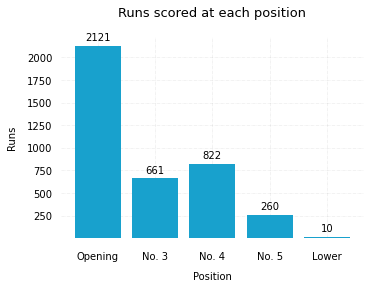

In [32]:
fig=plt.figure()
ax=fig.add_axes([0.20,0.15,0.70,0.70])

ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2,zorder=0)

for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=10)
ax.yaxis.set_tick_params(pad=5)

lab=[x for x in range(250,2400,250)]
ax.set_yticks(lab)


ax.set_xlabel('Position',labelpad=10)
ax.set_ylabel('Runs',labelpad=10)
fig_title='Runs scored at each position'
ax.text(0.5, 1.10,fig_title,horizontalalignment='center',fontsize=13,transform=ax.transAxes)

def autolabel(rects):
    for rect in rects:
        height=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 40+height,
                '%d' % int(height),
                ha='center', va='bottom')

rects=ax.bar(positions,runs_positions,label='Runs',align='center',color='#18a1cd',zorder=3)
autolabel(rects)
plt.savefig('graphs/Runs vs Positions.png',dpi=300)
plt.show()

In [33]:
rcb_pos=df_rcb['position'].value_counts()
rcb_pos

 5    8
 4    8
 6    2
 2    2
-1    2
 7    1
 1    1
Name: position, dtype: int64

In [34]:
pos_rcb_matches=[3,8,8,3,2]
pos_rcb=['Opening','No. 4','No. 5','Lower','DNB']

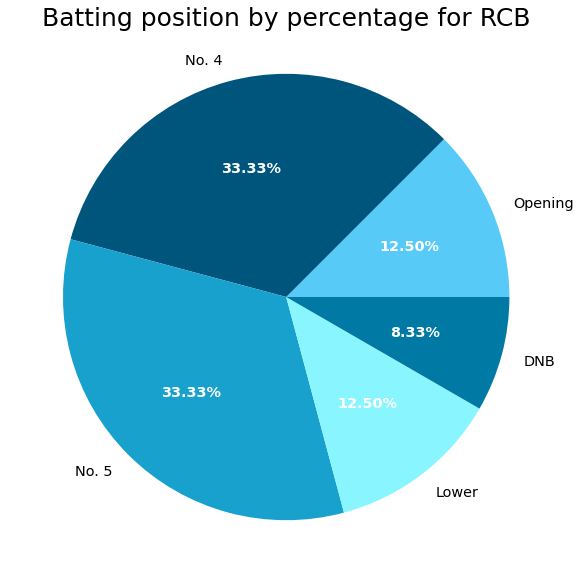

In [35]:
fig,ax=plt.subplots(figsize=(10,10))
ax.axis('equal')
colors=['#58caf8','#00557d','#18a1cd','#88f5ff','#007aa4','#007aa4']
patches,texts,pcts=ax.pie(pos_rcb_matches, labels=pos_rcb,colors=colors,autopct='%1.2f%%',
                          wedgeprops={'linewidth': 0, 'edgecolor': 'white'},
                         textprops={'size': 'x-large'})
plt.setp(pcts, color='white', fontweight='bold')
fig_title='Batting position by percentage for RCB'
plt.text(0.5, 1,fig_title,horizontalalignment='center',fontsize=25,transform=ax.transAxes)
plt.savefig('graphs/Matches vs Positions for RCB.png',dpi=300)
plt.show()

In [36]:
csk_pos=df_csk['position'].value_counts()
csk_pos

1    29
2    11
3     3
Name: position, dtype: int64

In [37]:
pos_csk_matches=[40,3]
pos_csk=['Opening','No. 3']

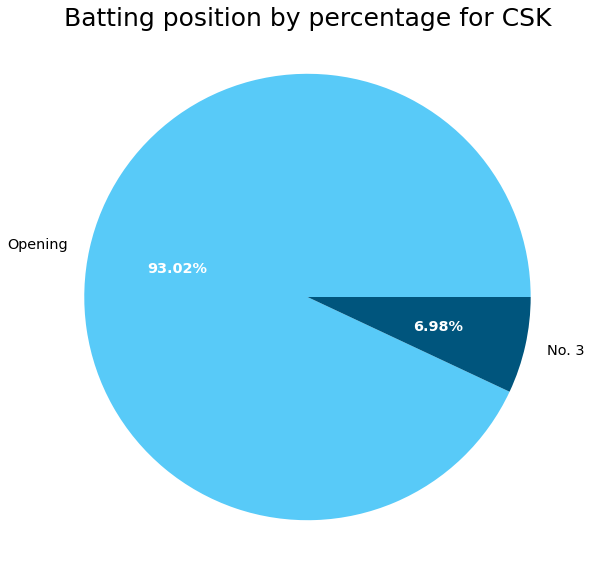

In [38]:
fig,ax=plt.subplots(figsize=(10,10))
ax.axis('equal')
colors=['#58caf8','#00557d','#18a1cd','#88f5ff','#007aa4','#007aa4']
patches,texts,pcts=ax.pie(pos_csk_matches, labels=pos_csk,colors=colors,autopct='%1.2f%%',
                          wedgeprops={'linewidth': 0, 'edgecolor': 'white'},
                         textprops={'size': 'x-large'})
plt.setp(pcts,color='white',fontweight='bold')
# plt.tight_layout()
fig_title='Batting position by percentage for CSK'
plt.text(0.5, 1,fig_title,horizontalalignment='center',fontsize=25,transform=ax.transAxes)
plt.savefig('graphs/Matches vs Positions for CSK.png',dpi=300)
plt.show()

In [39]:
matches_30=0
matches_50=0
matches_100=0
wins_30=0
wins_50=0
wins_100=0
for file in jsonfiles:
    f=open(path+'/'+file,)
    data=json.load(f)
    info=data['info']
    outcome=info['outcome']
    winner=outcome.get('winner')
    players=info['players']
    total_runs=0
    for team in players:
        player_list=players[team]
        if player in player_list and (player_list[0]==player or player_list[1]==player):
            innings=data['innings']
            for inning in innings:
                if inning['team']==team:
                    overs=inning.get('overs')
                    for over in overs:
                        for delivery in over.get('deliveries'):
                            if delivery['batter']==player:
                                runs=delivery.get('runs')
                                total_runs=total_runs+runs['batter']
                    flag=(team==winner)
                    if total_runs >= 30:
                        matches_30=matches_30+1
                        if flag:
                            wins_30=wins_30+1
                    if total_runs >= 50:
                        matches_50=matches_50+1
                        if flag:
                            wins_50=wins_50+1
                    if total_runs >= 100:
                        matches_100=matches_100+1
                        if flag:
                            wins_100=wins_100+1

In [40]:
print(matches_30,wins_30)
print(matches_50,wins_50)
print(matches_100,wins_100)

29 15
14 10
4 3


In [41]:
matches=[29,14,4]
wins=[15,10,3]
labels=[30,50,100]

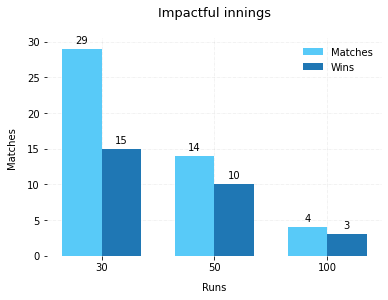

In [42]:
x=np.arange(len(labels)) #the label locations
w=0.35 #the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x,matches, w, color='#58caf8',zorder=3)
rects2 = ax.bar(x+w,wins,w,zorder=3)

ax.grid(b=True, color='grey',linestyle='-.',linewidth=0.5,alpha=0.2,zorder=0)
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.set_xlabel('Runs',labelpad=10)
ax.set_ylabel('Matches',labelpad=10)

ax.set_xticks(x+w/2)
ax.set_xticklabels(labels)

ax.legend((rects1[0],rects2[0]),('Matches', 'Wins'),frameon=False)

def autolabel(rects):
    for rect in rects:
        height=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.5+height,
                '%d' % int(height),
                ha='center', va='bottom')

fig_title='Impactful innings'
ax.text(0.5, 1.10,fig_title,horizontalalignment='center',fontsize=13,transform=ax.transAxes)

autolabel(rects1)
autolabel(rects2)

plt.savefig('graphs/Impactful innings.png',dpi=300)
plt.show()